In [ ]:
!pip install dlib
!pip install mtcnn
!pip install facenet_pytorch

In [13]:
import cv2
import numpy as np
from dlib import get_frontal_face_detector
import torch

from google.colab.patches import cv2_imshow

# Implementation of algorithms

## HAARCASCADE CLASSIFIER

In [ ]:
#Load the haarcascade file
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture("friends.mp4")
 
while True:
  ret, frame = cap.read()
  if ret:
  
    faces = faceCascade.detectMultiScale2(frame, scaleFactor=1.1, minNeighbors=5, flags=cv2.CASCADE_SCALE_IMAGE)
  
    for (x, y, w, h) in faces[0]:
      conf = faces[1][0][0]
      if conf > 5:
        text = f"{conf*10:.2f}%"
        # cv2.putText(frame, text, (x, y-20), cv2.FONT_HERSHEY_SIMPLEX, 1,(170, 170, 170), 1)
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 255, 255), 1)

    cv2.imshow("Frame", frame)

  else:
    break
 
cap.release()
cv2.destroyAllWindows()

## OpenCV DNN

In [ ]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/opencv_face_detector.pbtxt
!wget https://github.com/spmallick/learnopencv/blob/master/AgeGender/opencv_face_detector_uint8.pb?raw=true -O opencv_face_detector_uint8.pb

In [ ]:
modelFile = "opencv_face_detector_uint8.pb"
configFile= "opencv_face_detector.pbtxt"
net = cv2.dnn.readNetFromTensorflow(modelFile, configFile)

cap = cv2.VideoCapture("friends.mp4")
 

while True:
  ret, frame = cap.read()
  if ret:      
    blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))
    net.setInput(blob)
    detection = net.forward()
  
    h, w = frame.shape[:2]
    for i in range(detection.shape[2]):

      confidence = detections[0, 0, i, 2]
      if confidence > 0.5:
        
        box = detection[0, 0, i, 3:7] * np.array([w, h, w, h])
        (x1, y1, x2, y2) = box.astype("int")
            
        cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 255), 1)

  else:
    break
 
cap.release()
cv2.destroyAllWindows()

## DLIB

In [5]:
face_detect = get_frontal_face_detector()

cap = cv2.VideoCapture("friends.mp4")
 
while True:
  ret, frame = cap.read()
  if ret:    
    faces = face_detect(frame, 1)
    for face in faces:

      x1 = face.left()
      y1 = face.bottom()
      x2 = face.right()
      y2 = face.top()
      cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 1)
    
  else:
    break

cap.release()
cv2.destroyAllWindows()

## MTCNN

In [15]:
from mtcnn import MTCNN

detector = MTCNN()
#Load a video, if we were using google colab we would
#need to upload the video to Google Colab
cap = cv2.VideoCapture("friends.mp4")

while True:
  ret, frame = cap.read()
  if ret:
    boxes = detector.detect_faces(frame)
    if boxes:
      box = boxes[0]['box']
      conf = boxes[0]['confidence']
      x, y, w, h = box[0], box[1], box[2], box[3]
    
      if conf > 0.5:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 255), 1)   
  else:
    break
cap.release()
cv2.destroyAllWindows()

## FACENET

In [22]:
from facenet_pytorch import MTCNN

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
mtcnn = MTCNN(keep_all=True, device=device)
 
cap = cv2.VideoCapture("friends.mp4")
while True:
  ret, frame = cap.read()
  if ret:
    boxes, conf = mtcnn.detect(frame)

    if conf[0] !=  None:
      for (x, y, w, h) in boxes:
        text = f"{conf[0]*100:.2f}%"
        cv2.putText(frame, text, (x, y-20), 
                cv2.FONT_HERSHEY_SIMPLEX, 1,(170, 170, 170), 1)
        x, y, w, h = int(x), int(y), int(w), int(h)

        cv2.rectangle(frame, (x, y), (w, h), (255, 255, 255), 1)
  else:
    break
 
cap.release()
cv2.destroyAllWindows()

# EXECUTION TIME

In [ ]:
from matplotlib import pyplot as plt
from PIL import Image
from tqdm.notebook import tqdm
import time

## Initialization steps

In [ ]:
cap = cv2.VideoCapture("output.mp4")

In [ ]:
images = []
for i in tqdm(range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))):
    _, image = cap.read()
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    images.append(image)
cap.release()

images = np.stack(images)

print('Shapes:')
print(images.shape)


Shapes:
(699, 400, 600, 3)


In [ ]:
def timer(detector, detect_fn, images, *args):
    start = time.time()
    faces = detect_fn(detector, images)
    elapsed = time.time() - start
    print(f'{elapsed:.3f} seconds')
    return elapsed

## HAARCASCADE

In [ ]:
cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
def detect_haar(detector, images):
    for img in images:
      detector.detectMultiScale(img)

In [ ]:
data_haar = timer(cascade, detect_haar, images)

111.880 seconds


## DNN OPENCV

In [ ]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/opencv_face_detector.pbtxt
modelFile = "opencv_face_detector_uint8.pb"
configFile= "opencv_face_detector.pbtxt"
net = cv2.dnn.readNetFromTensorflow(modelFile, configFile)

--2020-11-30 07:34:44--  https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/opencv_face_detector.pbtxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34975 (34K) [text/plain]
Saving to: ‘opencv_face_detector.pbtxt’

opencv_face_detecto 100%[===================>]  34.16K  --.-KB/s    in 0s      

2020-11-30 07:34:44 (90.8 MB/s) - ‘opencv_face_detector.pbtxt’ saved [34975/34975]



In [ ]:
def detect_dnn(detector, images):
  for img in images:
    blob = cv2.dnn.blobFromImage(cv2.resize(img, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))
    detector.setInput(blob)
    detection = detector.forward()

In [ ]:
data_dnn = timer(net, detect_dnn, images)

63.856 seconds


## DLIB

In [ ]:
detector = get_frontal_face_detector()

def detect_dlib(detector, images):
  for img in images:
    detection = detector(img)

In [ ]:
data_dlib = timer(detector, detect_dlib, images)

30.591 seconds


## MTCNN

In [ ]:
from mtcnn import MTCNN
detector = MTCNN()

def detect_mtcnn(detector, images):
  for img in images:
    detection = detector.detect_faces(img)

In [ ]:
data_mtcnn = timer(detector, detect_mtcnn, images)

315.166 seconds


## FACENET

In [ ]:
from facenet_pytorch import MTCNN
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
detector = MTCNN(device=device, post_process=False)

def detect_facenet(detector, images):
  for img in images:
    detection = detector(img)

In [ ]:
data_facenet = timer(detector, detect_facenet, images)

45.227 seconds


## RESULTS

In [ ]:
all_data = [data_haar, data_dnn, data_dlib, data_facenet]
cap = cv2.VideoCapture("output.mp4")

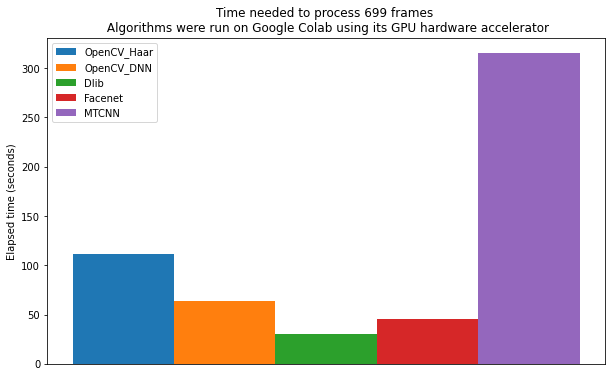

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

pos = np.arange(1)
plt.bar(pos, data_haar, 0.2, label='OpenCV_Haar')
plt.bar(pos + 0.2, data_dnn, 0.2, label='OpenCV_DNN')
plt.bar(pos + 0.4, data_dlib, 0.2, label='Dlib')
plt.bar(pos + 0.6, data_facenet, 0.2, label='Facenet')
plt.bar(pos + 0.8, data_mtcnn, 0.2, label='MTCNN')

ax.set_ylabel('Elapsed time (seconds)')
ax.get_xaxis().set_visible(False)
ax.set_title("Time needed to process " + str(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))) + " frames \n Algorithms were run on Google Colab using its GPU hardware accelerator")
plt.legend();

In [ ]:
cap.release()